<a href="https://colab.research.google.com/github/douglasbarbosadelima/Data-Science/blob/master/primeira_conv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Primeira CNN, ainda o problema dos dígitos

In [1]:
!pip install tensorflow-gpu==2.0.0 

     |████████████████████████████████| 380.8MB 43kB/s 
     |████████████████████████████████| 450kB 61.8MB/s 
     |████████████████████████████████| 3.8MB 49.3MB/s 
ERROR: tensorflow 1.15.0 has requirement tensorboard<1.16.0,>=1.15.0, but you'll have tensorboard 2.0.2 which is incompatible.
ERROR: tensorflow 1.15.0 has requirement tensorflow-estimator==1.15.1, but you'll have tensorflow-estimator 2.0.1 which is incompatible.
  Found existing installation: tensorflow-estimator 1.15.1
    Uninstalling tensorflow-estimator-1.15.1:
      Successfully uninstalled tensorflow-estimator-1.15.1
  Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tensorboard-1.15.0


In [2]:
import tensorflow as tf
import numpy as np
tf.__version__

'2.0.0'

In [3]:
from keras.datasets import mnist
#download mnist data and split into train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

    8192/11490434 [..............................] - ETA: 0s

Using TensorFlow backend.


11493376/11490434 [==============================] - 0s 0us/step


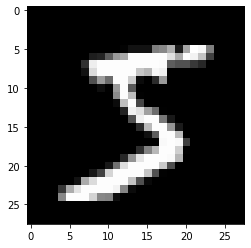

In [4]:
import matplotlib.pyplot as plt
#plot the first image in the dataset
plt.gray()
plt.imshow(X_train[0])

In [5]:
#check image shape
X_train[0].shape

(28, 28)

In [0]:
#reshape data to fit model
X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)

In [7]:
from keras.utils import to_categorical
#one-hot encoding, sklearn, keras..todo mundo tem isso pronto
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [0]:

#create model
model = tf.keras.Sequential([
  tf.keras.layers.Convolution2D(64, kernel_size=3, activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
  tf.keras.layers.Convolution2D(64, kernel_size=3, activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(10, activation='softmax')
])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                16010     
Total params: 53,578
Trainable params: 53,578
Non-trainable params: 0
____________________________________________________

In [0]:
#compile model using accuracy to measure model performance
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [11]:
#train the model
hist=model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 15s 243us/sample - loss: 0.2744 - accuracy: 0.9472 - val_loss: 0.0685 - val_accuracy: 0.9791
Epoch 2/10
60000/60000 [==============================] - 8s 131us/sample - loss: 0.0724 - accuracy: 0.9789 - val_loss: 0.0835 - val_accuracy: 0.9755
Epoch 3/10
60000/60000 [==============================] - 7s 123us/sample - loss: 0.0615 - accuracy: 0.9819 - val_loss: 0.0532 - val_accuracy: 0.9821
Epoch 4/10
60000/60000 [==============================] - 7s 124us/sample - loss: 0.0530 - accuracy: 0.9841 - val_loss: 0.0607 - val_accuracy: 0.9824
Epoch 5/10
60000/60000 [==============================] - 7s 122us/sample - loss: 0.0423 - accuracy: 0.9872 - val_loss: 0.0573 - val_accuracy: 0.9850
Epoch 6/10
60000/60000 [==============================] - 7s 123us/sample - loss: 0.0402 - accuracy: 0.9886 - val_loss: 0.0689 - val_accuracy: 0.9831
Epoch 7/10
60000/60000 [=========================

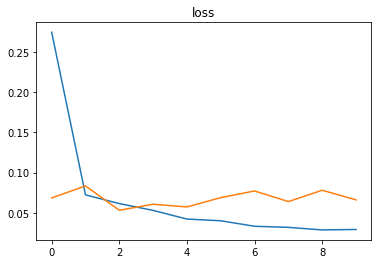

In [12]:
import matplotlib.pyplot as plt
plt.title('loss')
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.show()

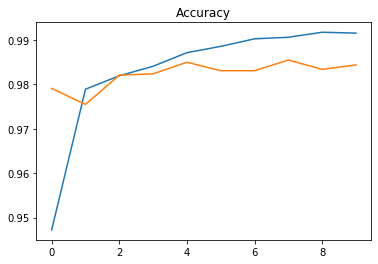

In [13]:
plt.title('Accuracy')
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.show()


Teste com amostra fabricada

In [15]:
img=plt.imread('oito.png')
img=255*img[:,:,0]
img=img.reshape((28,28,1))
model.predict_classes(np.array( [img] ))

array([8])

In [19]:
#Plot an image with 28x28 dimension
img=plt.imread('tres.png')
img=255*img[:,:,0]
img=img.reshape((28,28,1))
model.predict_classes(np.array( [img] ))

array([3])